基本方向為探索立委的政見與臉書貼文內容的關係

1.政見有在FB貼文中呈現嗎？
2.有呈現的是哪些立委？沒有是哪些？
3.有呈現的方式或型態是何？
4.分析為何有些立委會將政見的兌現，在臉書上呈現（不論多少），有些卻不是

In [223]:
import pandas as pd #引入環境內建函式庫pandas並簡寫其為pd
import jieba #引入斷詞函式庫jieba
from tqdm import tqdm #協助jieba進行斷詞迭代的文字重要性權重判斷的模組
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')#臉書資料
politics = pd.read_csv('9th_legislator_promise.csv')

以基隆市立委蔡適應為例，建立發文文字斷詞表

In [224]:
tsai = fb[fb.page_name == "蔡適應"]
tsai.head(1)
#檢查資料是否正確

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
3350,114129008623973_2023293414374180,114129008623973,蔡適應,政治人物,新內閣的第一天！關心豬瘟的防疫！\n\n立法院在最快時間內修正《動物傳染病防治條例》第45之1條，把罰鍰金額大幅提高。新法通過後，直到1/10為止，防檢局針對非洲豬瘟共開出52張20萬元的罰單，其中36張是中國公民。\n\n罰錢只是手段之一，還需要更多措施配合，包括航空公司、出入境海關的提醒、提醒再提醒、海巡走私防堵等等，看到蘇院長的衝勁，在此也要請全國人民一起配合防疫，守護台灣高品質豬肉與滷肉飯。\n\n#防疫非洲豬瘟人人有責\n#一起捍衛滷肉飯,蔡適應從「會做事 繼續衝」分享了 1 段影片。,video,https://www.facebook.com/114129008623973/posts/2023293414374180/,2019-01-15T09:34:30+0000,2019-01-15T17:34:30,...,蘇貞昌,這是這個內閣上工第一天的樣子，也是將來每一天，內閣團隊為台灣打拚的樣子。\n\n接地氣、會做事的內閣，不必落落長、不必講大道理、不要只有描述現象，將來所有民眾的問題，「發生什麼事、要用什麼方法解決、誰做、什麼時候完成」，都要清清楚楚，這是我的要求。唯有清楚說明政策，才能得到鄉親最直接的回饋。\n\n#接地氣\n#會做事\n#衝,74,0,0,0,0,0,2,3


In [225]:
tsai[tsai.created_time_taipei == max(tsai.created_time_taipei)]
#找出蔡適應發文的時間區段

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
4208,114129008623973_2624985420871640,114129008623973,蔡適應,政治人物,《國家新城掃街 感謝朋友們的熱烈支持！》\n\n適應今日到國家新城掃街，感謝各位朋友熱烈的支持，適應會更加努力守護台灣的民主自由！\n\n明年1月11日懇請\n支持立委１號 蔡適應\n支持總統３號 蔡英文 Tsai Ing-wen、 賴清德\n支持政黨１４號 民主進步黨\n一起護國會、保台灣！\n\n＃國家新城掃街\n＃2020台灣要贏 ＃基隆一定贏,NaN,photo,https://www.facebook.com/114129008623973/posts/2624985420871640/,2019-12-26T09:05:53+0000,2019-12-26T17:05:53,...,蔡適應貼文的相片,NaN,711,0,0,0,0,0,23,29


In [226]:
tsai[tsai.created_time_taipei == min(tsai.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
3376,114129008623973_2003551676348354,114129008623973,蔡適應,政治人物,伴隨著獨立樂團、在地樂團的歌聲，我們一起倒數揮別2018年、迎向2019年，不畏風雨我們繼續向前行！\n\n#新年快樂\n#祝福每位朋友\n#立法委員蔡適應,蔡適應新增了 20 張相片 — 在基隆市,photo,https://www.facebook.com/114129008623973/posts/2003551676348354/,2019-01-01T03:27:31+0000,2019-01-01T11:27:31,...,蔡適應貼文的相片,NaN,108,0,0,0,0,0,7,9


In [227]:
tsai['new_date'] = pd.to_datetime(tsai['created_time_taipei']).dt.date
tsai['month_year'] = pd.to_datetime(tsai['new_date']).dt.to_period('M')
tsai.head(1)
#先做群聚，建立新的時間格式，再重新定義新的編號

<ipython-input-227-30ae314256d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsai['new_date'] = pd.to_datetime(tsai['created_time_taipei']).dt.date
<ipython-input-227-30ae314256d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsai['month_year'] = pd.to_datetime(tsai['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
3350,114129008623973_2023293414374180,114129008623973,蔡適應,政治人物,新內閣的第一天！關心豬瘟的防疫！\n\n立法院在最快時間內修正《動物傳染病防治條例》第45之1條，把罰鍰金額大幅提高。新法通過後，直到1/10為止，防檢局針對非洲豬瘟共開出52張20萬元的罰單，其中36張是中國公民。\n\n罰錢只是手段之一，還需要更多措施配合，包括航空公司、出入境海關的提醒、提醒再提醒、海巡走私防堵等等，看到蘇院長的衝勁，在此也要請全國人民一起配合防疫，守護台灣高品質豬肉與滷肉飯。\n\n#防疫非洲豬瘟人人有責\n#一起捍衛滷肉飯,蔡適應從「會做事 繼續衝」分享了 1 段影片。,video,https://www.facebook.com/114129008623973/posts/2023293414374180/,2019-01-15T09:34:30+0000,2019-01-15T17:34:30,...,74,0,0,0,0,0,2,3,2019-01-15,2019-01


In [228]:
tsai = tsai.sort_values(by=['like_count'])
#將資料按讚數排列(ascending為0降序排)
tsai

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
3702,114129008623973_2302257549811097,114129008623973,蔡適應,政治人物,明天是解嚴32週年，民主自由在過去，不是像呼吸、喝水般的平常，感謝過去許多民主前輩的奉獻，讓每台灣可以成為亞洲華人世界，多元文化的民主國家！\n\n#解嚴32週年 #民主自由 #得來不易\n\n歡迎跟適應加好友～\nhttp://line.me/ti/p/%40fxi6200r,NaN,status,https://www.facebook.com/114129008623973/posts/2302257549811097/,2019-07-14T03:38:01+0000,2019-07-14T11:38:01,...,9,0,0,0,0,0,1,0,2019-07-14,2019-07
3488,114129008623973_2131968160173371,114129008623973,蔡適應,政治人物,夢想盃揮灑熱情活力，鷹俠與眾位教練指導孩子們，一同享受棒球運動的樂趣！\n\n很高興可以幫助夢想盃棒球賽，引薦社會資源，讓許多喜愛棒球的孩子們，可以在大武崙棒球場競賽，也恭喜深美國小拿到冠軍，基隆的基層棒球需要各界人士一起來相挺，鷹俠和教練們週日的指導，相信孩子們都能獲益良多；另外，感謝大日開發公司捐贈15萬元給基隆家扶中心，幫助更多的孩子。\n\n基隆市大武崙棒球場和週邊的綠地，適應幫助基隆市政府向中央爭取的大武崙森林公園，目前已經在規劃中，未來將會有41公頃的森林休憩空間、結合複合多功能的運動場地，讓我們基隆的運動環境更趨完善。\n\n#兩日棒球營\n#夢想盃少年棒球比賽\n#百轟鷹俠造訪大武崙,蔡適應新增了 1 張相片 — 在基隆市。,photo,https://www.facebook.com/keelungING/photos/a.2131949786841875/2131951320175055/?type=3,2019-03-31T15:51:13+0000,2019-03-31T23:51:13,...,9,0,0,0,0,0,0,3,2019-03-31,2019-03
3369,114129008623973_2008235302546658,114129008623973,蔡適應,政治人物,《國際扶輪社3490地區》\n《九社聯合幫助安樂高中弱勢學子》\n\n國際扶輪3490地區基隆分區九個社團聯合服務社區，捐贈基隆市立安樂高級\n中學20萬元，與校方執行助學計畫幫助弱勢學生，今日(1/4)邀請適應、國際扶輪社3490地區基隆分區扶輪社、基隆社、基隆南區社、基隆東區社、基隆西北區社、基隆東南社、基隆中區社、新北北海岸社、基隆永昌社、新北瑞芳社，一同捐贈善款資助弱勢學生助學計畫。\n\n適應與國際扶輪社3490地區長期都關注基隆學子的就學環境，一起號招九社聯合來幫助弱勢家庭的學生，讓孩子們不會因為經濟問題，無法繼續穩定就學，我們會持續來用心關懷，所有學子的就學環境。\n\n#國際扶輪社3490地區\n#九社聯合幫助安樂高中弱勢學子\n#立法委員蔡適應,蔡適應──在基隆市。,video,https://www.facebook.com/114129008623973/posts/2008235302546658/,2019-01-04T11:54:34+0000,2019-01-04T19:54:34,...,30,0,0,0,0,0,0,18,2019-01-04,2019-01
3889,114129008623973_2391184604251724,114129008623973,蔡適應,政治人物,《協助信義國中棒球體育班，媒合企業捐贈天成外套、幸福點心》\n\n適應與基隆市政府不斷的努力下，促成 ＃台北陽明山國際獅子會 、 ＃台北聯合國際聯青社 與東岸商場經營業者 ＃大日開發 ，在9月2日下午聯合捐贈信義國中棒球隊30件，每件價值1500元的棒球外套，還有每天練球後的點心費用一年、共9萬6千元。\n\n讓球員們於每天練球完畢後，有點心可吃，保持充沛的體力，接續在5點開始上課業加強輔導課。\n\n在基隆市推廣棒球運動非常不容易，感謝捐贈的企業團體，可以一起來支持基層體育，讓信義國中棒球隊的孩子有信心！共同來協助基隆基層棒球的發展，希望透過這樣的努力，能讓棒球運動在基隆也能夠發展起來。\n\n＃信義國中棒球隊 ＃天成外套 ＃幸福點心,蔡適應新增了 13 張相片 — 在基隆市。,photo,https://www.facebook.com/keelungING/photos/a.2391171157586402/2391184417585076/?type=3,2019-09-03T07:41:56+0000,2019-09-03T15:41:56,...,39,0,0,0,0,0,5,7,2019-09-03,2019-09
3360,114129008623973_2015057671864421,114129008623973,蔡適應,政治人物,《青年學子展現藝文長才 教師培育功不可沒》\n\n在頒發學生的藝文競賽獎狀之前，首先要感謝老師們的細心栽培，適應很有榮幸能夠頒發獎狀，表揚我們的教師，也期許每位學子，能夠繼續精進學業與藝文能力、五育並進！\n\n＃基隆市107年度\n＃藝文競賽聯合頒獎典禮\n＃孩子們的才藝斐然\n＃立法委員蔡適應,蔡適應新增了 10 張相片 — 在基隆暖暖。,photo,https://www.facebook.com/keelungING/photos/a.2015041741866014/2015057671864421/?type=3,2019-01-09T10:24:30+0000,2019-01-09T18:24:30,...,40,0,0,0,0,0,3,0,2019-01-09,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3709,114129008623973_2295783187125200,114129008623973,蔡適應,政治人物,《接受徵召 全力以赴》\n\n民進黨中執會今宣布，將徵適應參選基隆市區域立委，我會持續全力以赴，爭取繼續為基隆市民服務的機會。\n\n過去三年的任期，適應與市長 林右昌UChange分工合作，為基隆爭取許多建設，包括軍港遷移、大基隆歷史場景計畫、基隆輕軌，都已經陸續動工興建，林右昌是最能擘畫與執行建設的市長，而蔡適應是最能幫基隆中央爭取建設預算的立委。\n\n除了地方建設外，在國家政策領域，適應深耕外交國防，專業問政也獲得民間團體肯定，公民監督國會聯盟的評鑑，更是連續六會期獲得優秀立委。\n\n爭取連任是為了繼續服務基隆市民，基隆還有許多的建設需要中央支持，包括高地社區供水補助、快捷公車核定、公路品質提升、長照2.0、河川整治，我期待繼續在這些與民息息相關的民生議題領域中，為基隆爭取更多的經費。\n\n#全力以赴 #持續為基隆打拚,蔡適應──在基隆市。,photo,https://www.facebook.com/114129008623973/posts/2295783187125200/,2019-07-10T10:23:05+0000,2019-07-10T18:23:05,...,6091,0,0,0,0,0,272,63,2019-07-10,2019-07
3757,114129008623973_2314545308582321,114129008623973,蔡適應,政治人物,感謝許多前來記者會相挺的朋友，適應就任3年多來每天戰戰兢兢，想著要讓基隆進步，在立法院問政，配合市長的規劃，爭取中央支持，做基隆建設的最佳後盾！\n\n競選連任，懇請您繼續相挺。\n\n#相挺適應 #基隆必勝\n#公督盟評鑑 #優秀立委\n-\n-\n-\n-\n-\n——相關新聞連結——\n立委蔡適應競選連任 卓榮泰：明星帥立委做明星級建設\nhttps://news.ltn.com.tw/news/politics/breakingnews/2858602\n\n2020立委選戰》卓榮泰力挺蔡適應：他為基隆市做出「明星級的建設」\nhttps://www.storm.mg/article/1504110\n\n到基隆推薦立委蔡適應 卓榮泰：問政明星級加韓星外型\nhttps://udn.com/news/story/7328/3940945\n\n卓榮泰\n林右昌UChange\n郭昆文\n張錦煌\n林坤明\n葉振成\n#童永\n蘇仁和 （蘇仁河）\n鄭文婷律師\n陳宜\n張秉鈞。最認真\n基隆好漢－張顥瀚\n張之豪\n童子瑋 仁愛新世代\nHideyo Lu\n#謝世英\n施世明\n游祥耀\n洪森 永\n江志強\n林明智,蔡適應─

In [229]:
tsai.reset_index(inplace=True)
tsai
#將被重新命名過的索引標籤回復成系統本來的排列(從0開始)

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
0,3702,114129008623973_2302257549811097,114129008623973,蔡適應,政治人物,明天是解嚴32週年，民主自由在過去，不是像呼吸、喝水般的平常，感謝過去許多民主前輩的奉獻，讓每台灣可以成為亞洲華人世界，多元文化的民主國家！\n\n#解嚴32週年 #民主自由 #得來不易\n\n歡迎跟適應加好友～\nhttp://line.me/ti/p/%40fxi6200r,NaN,status,https://www.facebook.com/114129008623973/posts/2302257549811097/,2019-07-14T03:38:01+0000,...,9,0,0,0,0,0,1,0,2019-07-14,2019-07
1,3488,114129008623973_2131968160173371,114129008623973,蔡適應,政治人物,夢想盃揮灑熱情活力，鷹俠與眾位教練指導孩子們，一同享受棒球運動的樂趣！\n\n很高興可以幫助夢想盃棒球賽，引薦社會資源，讓許多喜愛棒球的孩子們，可以在大武崙棒球場競賽，也恭喜深美國小拿到冠軍，基隆的基層棒球需要各界人士一起來相挺，鷹俠和教練們週日的指導，相信孩子們都能獲益良多；另外，感謝大日開發公司捐贈15萬元給基隆家扶中心，幫助更多的孩子。\n\n基隆市大武崙棒球場和週邊的綠地，適應幫助基隆市政府向中央爭取的大武崙森林公園，目前已經在規劃中，未來將會有41公頃的森林休憩空間、結合複合多功能的運動場地，讓我們基隆的運動環境更趨完善。\n\n#兩日棒球營\n#夢想盃少年棒球比賽\n#百轟鷹俠造訪大武崙,蔡適應新增了 1 張相片 — 在基隆市。,photo,https://www.facebook.com/keelungING/photos/a.2131949786841875/2131951320175055/?type=3,2019-03-31T15:51:13+0000,...,9,0,0,0,0,0,0,3,2019-03-31,2019-03
2,3369,114129008623973_2008235302546658,114129008623973,蔡適應,政治人物,《國際扶輪社3490地區》\n《九社聯合幫助安樂高中弱勢學子》\n\n國際扶輪3490地區基隆分區九個社團聯合服務社區，捐贈基隆市立安樂高級\n中學20萬元，與校方執行助學計畫幫助弱勢學生，今日(1/4)邀請適應、國際扶輪社3490地區基隆分區扶輪社、基隆社、基隆南區社、基隆東區社、基隆西北區社、基隆東南社、基隆中區社、新北北海岸社、基隆永昌社、新北瑞芳社，一同捐贈善款資助弱勢學生助學計畫。\n\n適應與國際扶輪社3490地區長期都關注基隆學子的就學環境，一起號招九社聯合來幫助弱勢家庭的學生，讓孩子們不會因為經濟問題，無法繼續穩定就學，我們會持續來用心關懷，所有學子的就學環境。\n\n#國際扶輪社3490地區\n#九社聯合幫助安樂高中弱勢學子\n#立法委員蔡適應,蔡適應──在基隆市。,video,https://www.facebook.com/114129008623973/posts/2008235302546658/,2019-01-04T11:54:34+0000,...,30,0,0,0,0,0,0,18,2019-01-04,2019-01
3,3889,114129008623973_2391184604251724,114129008623973,蔡適應,政治人物,《協助信義國中棒球體育班，媒合企業捐贈天成外套、幸福點心》\n\n適應與基隆市政府不斷的努力下，促成 ＃台北陽明山國際獅子會 、 ＃台北聯合國際聯青社 與東岸商場經營業者 ＃大日開發 ，在9月2日下午聯合捐贈信義國中棒球隊30件，每件價值1500元的棒球外套，還有每天練球後的點心費用一年、共9萬6千元。\n\n讓球員們於每天練球完畢後，有點心可吃，保持充沛的體力，接續在5點開始上課業加強輔導課。\n\n在基隆市推廣棒球運動非常不容易，感謝捐贈的企業團體，可以一起來支持基層體育，讓信義國中棒球隊的孩子有信心！共同來協助基隆基層棒球的發展，希望透過這樣的努力，能讓棒球運動在基隆也能夠發展起來。\n\n＃信義國中棒球隊 ＃天成外套 ＃幸福點心,蔡適應新增了 13 張相片 — 在基隆市。,photo,https://www.facebook.com/keelungING/photos/a.2391171157586402/2391184417585076/?type=3,2019-09-03T07:41:56+0000,...,39,0,0,0,0,0,5,7,2019-09-03,2019-09
4,3360,114129008623973_2015057671864421,114129008623973,蔡適應,政治人物,《青年學子展現藝文長才 教師培育功不可沒》\n\n在頒發學生的藝文競賽獎狀之前，首先要感謝老師們的細心栽培，適應很有榮幸能夠頒發獎狀，表揚我們的教師，也期許每位學子，能夠繼續精進學業與藝文能力、五育並進！\n\n＃基隆市107年度\n＃藝文競賽聯合頒獎典禮\n＃孩子們的才藝斐然\n＃立法委員蔡適應,蔡適應新增了 10 張相片 — 在基隆暖暖。,photo,https://www.facebook.com/keelungING/photos/a.2015041741866014/2015057671864421/?type=3,2019-01-09T10:24:30+0000,...,40,0,0,0,0,0,3,0,2019-01-09,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,3709,114129008623973_2295783187125200,114129008623973,蔡適應,政治人物,《接受徵召 全力以赴》\n\n民進黨中執會今宣布，將徵適應參選基隆市區域立委，我會持續全力以赴，爭取繼續為基隆市民服務的機會。\n\n過去三年的任期，適應與市長 林右昌UChange分工合作，為基隆爭取許多建設，包括軍港遷移、大基隆歷史場景計畫、基隆輕軌，都已經陸續動工興建，林右昌是最能擘畫與執行建設的市長，而蔡適應是最能幫基隆中央爭取建設預算的立委。\n\n除了地方建設外，在國家政策領域，適應深耕外交國防，專業問政也獲得民間團體肯定，公民監督國會聯盟的評鑑，更是連續六會期獲得優秀立委。\n\n爭取連任是為了繼續服務基隆市民，基隆還有許多的建設需要中央支持，包括高地社區供水補助、快捷公車核定、公路品質提升、長照2.0、河川整治，我期待繼續在這些與民息息相關的民生議題領域中，為基隆爭取更多的經費。\n\n#全力以赴 #持續為基隆打拚,蔡適應──在基隆市。,photo,https://www.facebook.com/114129008623973/posts/2295783187125200/,2019-07-10T10:23:05+0000,...,6091,0,0,0,0,0,272,63,2019-07-10,2019-07
920,3757,114129008623973_2314545308582321,114129008623973,蔡適應,政治人物,感謝許多前來記者會相挺的朋友，適應就任3年多來每天戰戰兢兢，想著要讓基隆進步，在立法院問政，配合市長的規劃，爭取中央支持，做基隆建設的最佳後盾！\n\n競選連任，懇請您繼續相挺。\n\n#相挺適應 #基隆必勝\n#公督盟評鑑 #優秀立委\n-\n-\n-\n-\n-\n——相關新聞連結——\n立委蔡適應競選連任 卓榮泰：明星帥立委做明星級建設\nhttps://news.ltn.com.tw/news/politics/breakingnews/2858602\n\n2020立委選戰》卓榮泰力挺蔡適應：他為基隆市做出「明星級的建設」\nhttps://www.storm.mg/article/1504110\n\n到基隆推薦立委蔡適應 卓榮泰：問政明星級加韓星外型\nhttps://udn.com/news/story/7328/3940945\n\n卓榮泰\n林右昌UChange\n郭昆文\n張錦煌\n林坤明\n葉振成\n#童永\n蘇仁和 （蘇仁河）\n鄭文婷律師\n陳宜\n張秉鈞。最認真\n基隆好漢－張顥瀚\n張之豪\n童子瑋 仁愛新世代\nHideyo Lu\n#謝世英\n施世明\n游祥耀\n洪森 永\n江志強\n林明智,蔡適應──在基隆市。,photo,https://www.facebook.com/114129008623973/posts/2314545308582321/,2019-07-21T08:52:08+0000,...,7209,0,0,

結巴斷詞 jieba

1.   len(liu): 看蔡適應的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做tasi_docs，型態是pandas.core.frame.DataFrame
4.   原本tsai_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [230]:
doc_names = range(len(tsai)) #蔡適應有幾篇文章，小於924的筆數
doc_names

range(0, 924)

In [231]:
import numpy as np #引入向量矩陣運算函式庫numpy
tsai = tsai.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(tsai['message'])#蔡適應貼文的所有資料
tsai_docs = pd.DataFrame(columns=['jieba_results'])
tsai_docs['jieba_results'] = tsai_docs['jieba_results'].astype('str')

ieba 斷詞模組最著名的功能就是提供斷詞模式，主要分為 
1.精確模式:將句子最精確的切開，適合文本分析 
2.全模式:把句子中所有的可以成詞的詞語都斷出来，速度非常快。 
3.搜索引擎模式:在精確模式的基礎上，對長的詞語再次切分，提高召回率，適合用於搜索引擎分詞。

操作方式： 透過 jieba.cut () 來進行斷詞，cut_all 參數為 True 的話為全模式，預設為 False，也就是精確模式 jibea.cut_for_search () 是搜索引擎模式 cut ()、cur_for_search () 返回的結構都是一个可迭代的 generator，因此使用 for 迴圈來取得每個斷詞。 也可以使用 lcut ()，意思跟 cut () 是一樣的，只是返回的型態變成 list，方便使用。

In [232]:
words = jieba.lcut(text_list[23], cut_all = False)
print(words)#查看斷詞的結果第23篇，精確模式(cut_all = False)，全模式斷詞則是(cut_all = True)

['《', '爭取', '基金', '一路', '嚴重', '損壞', '路段', '整頓', '刨', '鋪', '》', '\n', '\n', '近來', '有', '許多', '朋友', '向', '我們', '反應', '，', '道路', '補釘', '凹凸不平', '，', '加上', '人', '孔蓋', '因天雨', '濕滑', '，', '常有', '機車', '騎士', '摔車', '，', '興', '寮', '里', ' ', '#', '黃', '書筠', ' ', '里長', '更是', '每日', '經過', '、', '覺得險象', '環生', '，', '督促', '有關', '單位', '盡速', '改善', '、', '機車', '騎士', '放慢', '速度', '。', '\n', '\n', '由', '於', '基金', '一路', '目前', '已經', '移交', '公路', '總局', '，', '會', '勘', '後', '公路', '總局', '會', '要求', '廠商施', '作時', '，', '注意', '路面', '的', '平整', '及', '方正', '刨', '鋪', '得', '的', '品質', '，', '並且', '在', '六月', '底', '前針', '對', '基金', '一路', '，', '改善', '路面', '損壞', '嚴重', '的', '路段', '。', '\n', '\n', '另外', '，', '事業', '單位', '的', '人', '孔蓋', '，', '會', '請', '有關', '單位', '盡速', '規畫', '下', '地', '事宜', '，', '日', '後', '配合', '基金', '一路', '的', '定期', '養護', '日程', '。', '\n', '\n', '＃', '基金', '一路', '\n', '＃', '路面', '整頓', '改善', '\n', '＃', '立法', '委員', '蔡', '適應']


In [233]:
words = jieba.lcut(text_list[922], cut_all = False)
print(words)#回去改斷詞，查看另一篇斷詞如何

['基隆', '有', '好', '幾家', '好吃', '的', '排骨飯', '，', '讓', '服務處', '助理', '們', '爭論', '不休', '的', '其中', '一間', '，', '就是', '廟口', '的', '魯', '排骨飯', '，', '大家', '各有所好', '；', '等等', '晚餐', '想', '好吃', '什麼', '了', '嗎', '？', '\n', '\n', '＃', '魯', '排骨飯', ' ', '＃', '提示', '號碼', '21', ' ', '＃', '你', '懂得']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，蔡適應的篇數有924篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的蔡適應貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和tsai_docs合併。</br> 最後我們tsai_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [234]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)#清除符號

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪🐸🎶👩👦👶👧👨📺️❤🐶🐱🍬👉✅🍺🌏🌳👥💡🛵🏍🦠⭐️💫☀️🌝🎼🤹🌟✨⚡️☢️📢]','',text)
    s = pd.Series({'jieba_results': text})
    tsai_docs = tsai_docs.append(s, ignore_index=True)#每次的斷詞結果都加回tsai_docs

In [235]:
#tsai_docs.iloc[400:,]  #從讚數最多的檢查

In [236]:
text_list

['明天是解嚴32週年，民主自由在過去，不是像呼吸、喝水般的平常，感謝過去許多民主前輩的奉獻，讓每台灣可以成為亞洲華人世界，多元文化的民主國家！\n\n#解嚴32週年 #民主自由 #得來不易\n\n歡迎跟適應加好友～\nhttp://line.me/ti/p/%40fxi6200r',
 '夢想盃揮灑熱情活力，鷹俠與眾位教練指導孩子們，一同享受棒球運動的樂趣！\n\n很高興可以幫助夢想盃棒球賽，引薦社會資源，讓許多喜愛棒球的孩子們，可以在大武崙棒球場競賽，也恭喜深美國小拿到冠軍，基隆的基層棒球需要各界人士一起來相挺，鷹俠和教練們週日的指導，相信孩子們都能獲益良多；另外，感謝大日開發公司捐贈15萬元給基隆家扶中心，幫助更多的孩子。\n\n基隆市大武崙棒球場和週邊的綠地，適應幫助基隆市政府向中央爭取的大武崙森林公園，目前已經在規劃中，未來將會有41公頃的森林休憩空間、結合複合多功能的運動場地，讓我們基隆的運動環境更趨完善。\n\n#兩日棒球營\n#夢想盃少年棒球比賽\n#百轟鷹俠造訪大武崙',
 '《國際扶輪社3490地區》\n《九社聯合幫助安樂高中弱勢學子》\n\n國際扶輪3490地區基隆分區九個社團聯合服務社區，捐贈基隆市立安樂高級\n中學20萬元，與校方執行助學計畫幫助弱勢學生，今日(1/4)邀請適應、國際扶輪社3490地區基隆分區扶輪社、基隆社、基隆南區社、基隆東區社、基隆西北區社、基隆東南社、基隆中區社、新北北海岸社、基隆永昌社、新北瑞芳社，一同捐贈善款資助弱勢學生助學計畫。\n\n適應與國際扶輪社3490地區長期都關注基隆學子的就學環境，一起號招九社聯合來幫助弱勢家庭的學生，讓孩子們不會因為經濟問題，無法繼續穩定就學，我們會持續來用心關懷，所有學子的就學環境。\n\n#國際扶輪社3490地區\n#九社聯合幫助安樂高中弱勢學子\n#立法委員蔡適應',
 '《協助信義國中棒球體育班，媒合企業捐贈天成外套、幸福點心》\n\n適應與基隆市政府不斷的努力下，促成 ＃台北陽明山國際獅子會 、 ＃台北聯合國際聯青社 與東岸商場經營業者 ＃大日開發 ，在9月2日下午聯合捐贈信義國中棒球隊30件，每件價值1500元的棒球外套，還有每天練球後的點心費用一年、共9萬6千元。\n\n讓球員們於每天練球完畢後，有點心可吃，保持充沛的體力，接續在5點開始上課業加強輔導課。\n\n在基隆

In [237]:
tsai_docs #所有貼文的斷詞結果

,jieba_results
0,明天 是 解嚴 週年 民主自由 在 過去 不是 像 呼吸 喝水 般的 平常 感謝 過去 許多 民主 前輩 的 奉獻 讓 每 台灣 可以 成為 亞洲華人 世界 多元 文化 的 民主 國家 解嚴 週年 民主自由 得來 不易 歡迎 跟 適應加 好友 / / / / /
1,夢想 盃 揮灑 熱情 活力 鷹俠 與 眾位 教練 指導 孩子 們 一同 享受 棒球 運動 的 樂趣 很 高興 可以 幫助 夢 想 盃 棒球 賽 引薦 社會 資源 讓 許多喜 愛 棒球 的 孩子 們 可以 在 大武 崙 棒球 場競賽 也 恭喜 深美國 小 拿到 冠 軍 基隆 的 基層 棒球 需要 各界人士 一起 來 相挺 鷹俠 和 教練們 週日 的 指導 相信 孩子 們 都 能 獲益 良多 另外 感謝 大日 開發 公司 捐贈 萬元給 基隆 家 扶 中心 幫助 更 多 的 孩子 基隆市 大武 崙 棒球 場和 週邊 的 綠地 適應 幫助 基隆市 政府 向 中央 爭取 的 大武 崙 森林 公園 目前 已經 在 規劃 中 未來 將會 有 公頃 的 森林 休憩 空間 結合 複 合 多功能 的 運動場 地 讓 我們 基隆 的 運動 環境 更 趨 完善 兩日 棒球 營 夢想 盃 少年 棒球 比賽 百轟鷹 俠 造訪 大武 崙
2,《 國際 扶輪社 地區 《 九社 聯合 幫助安樂 高中 弱勢 學子 國際 扶輪 地區 基隆 分區 九個 社團 聯合 服務 社區 捐贈 基隆市 立安樂 高級 中學 萬元 與 校方 執行助 學計畫 幫助 弱勢 學生 今日 / 邀請 適應 國際 扶輪社 地區 基隆 分區 扶輪社 基隆 社 基隆 南區社 基隆 東區社 基隆 西北 區社 基隆 東 南社 基隆 中區社 新北 北海岸 社 基隆 永昌 社 新北 瑞芳 社 一同 捐贈 善款 資助 弱勢 學生助 學計畫 適應 與 國際 扶輪社 地區長 期 都 關注 基隆 學子 的 就 學環境 一起 號招 九社 聯合來 幫助 弱勢 家庭 的 學生 讓 孩子 們 不會 因為 經濟 問題 無法 繼續 穩定 就 學 我們 會 持續 來 用心 關懷 所有 學子 的 就 學環境 國際 扶輪社 地區 九社 聯合 幫助安樂 高中 弱勢 學子 立法 委員 蔡 適應
3,《 協助 信義國 中 棒球 體育班 媒合 企業 捐贈 天成 外套 幸福 點心 適應 與 基隆市 政府 不斷 的 努力 下 促成 台北 陽明 山國際 獅子會 台北 聯合國際 聯青社 與 東岸 商場 經營業者 大日 開發 在 月 日 下午 聯合 捐贈 信義國 中 棒球 隊 件 每件 價值 元 的 棒球 外套 還有 每天 練球 後 的 點心 費用 一年 共 萬 千元 讓 球員們 於 每天 練球 完畢 後 有點心 可 吃 保持 充沛 的 體力 接續 在 點開始 上 課業 加強 輔導課 在 基隆市 推廣 棒球 運動 非常 不 容易 感謝 捐贈 的 企業 團體 可以 一起 來 支持 基層 體育 讓 信義國 中 棒球 隊 的 孩子 有 信心 共同 來 協助 基隆 基層 棒球 的 發展 希望 透過 這樣 的 努力 能 讓 棒球 運動 在 基隆 也 能夠 發展 起來 信義國 中 棒球 隊 天成 外套 幸福 點心
4,《 青年 學子展 現藝 文長 才 教師 培育 功 不可 沒 在 頒 發學生 的 藝文 競賽 獎狀 之前 首先 要 感謝 老師們 的 細心 栽培 適應 很 有榮 幸能 夠頒發 獎狀 表揚 我們 的 教師 也 期許 每位 學子 能夠 繼續 精進 學業 與 藝文 能力 五育 並進 基隆市 年度 藝文 競賽 聯合 頒獎 典禮 孩子 們 的 才 藝 斐然 立法 委員 蔡 適應
...,...
919,《 接受 徵召 全力以赴 民進黨 中 執會 今 宣布 將徵適 應 參選 基隆市 區域 立委 我會 持續 全力以赴 爭取 繼續 為 基隆 市民 服務 的 機會 過去 三年 的 任期 適應 與 市長 林右昌 分工合作 為 基隆 爭取 許多 建設 包括 軍港 遷移 大 基隆 歷史場 景計畫 基隆 輕軌 都 已經 陸續動 工興建 林右昌 是 最能 擘畫 與 執行 建設 的 市長 而 蔡 適應 是 最能 幫 基隆 中央 爭取 建設 預算 的 立委 除了 地方 建設 外 在 國家 政策 領域 適應 深耕 外交 國防 專業 問政 也 獲得民間 團體 肯定 公民 監督國會 聯盟 的 評鑑 更是 連續 六會期 獲得 優秀 立委 爭取 連任 是 為 了 繼續 服務 基隆 市民 基隆 還有 許多 的 建設 需要 中央 支持 包括 高地 社區 供水 補助 快捷 公車 核定 公路 品質 提升 長 照 河川 整治 我 期待 繼續 在 這些 與 民息息 相關 的 民生 議題 領域 中 為 基隆 爭取 更 多 的 經費 全力以赴 持續 為 基隆 打 拚
920,感謝 許多前 來 記者會 相挺 的 朋友 適應 就任 年 多來 每天 戰戰兢兢 想 著要 讓 基隆 進步 在 立法院 問政 配合 市長 的 規劃 爭取 中央 支持 做 基隆 建設 的 最佳 後 盾 競選連任 懇請 您 繼續 相挺 相挺 適應 基隆 必勝 公督盟 評鑑 優秀 立委 相關 新聞 連結 立委 蔡適 應 競選連任 卓榮泰 明星 帥 立委 做 明星 級 建設 / / / / / / 立委 選戰 卓榮 泰力 挺 蔡 適應 他 為 基隆市 做出 明星 級 的 建設 / / / / 到 基隆 推薦 立委 蔡適 應 卓榮泰 問政 明星 級加 韓星 外型 / / / / / / 卓榮泰 林右昌 郭昆文 張錦煌 林坤明 葉振成 童永 蘇 仁和 蘇仁河 鄭文婷律師 陳 宜 張秉鈞 最認 真 基隆 好漢 張顥瀚 張之豪 童子瑋 仁愛新 世代 謝世英 施世明 游祥耀 洪森 永 江志強 林 明智
921,中國 今天 發 佈 消息 將暫 停中國 人民 到 台灣 自由 行 這樣 的 想法 人民 要 到 哪裡 旅遊 政府 竟然 用 政治 的 理由 禁止 這是 生活 在 自由 國度 的 我們 難以 理解 的 做法 近幾年 政府 在 觀光 政策 上 朝向 精 緻 化 發 展 讓 世界 旅客 能到 台灣 一遊 再遊 最近 基隆市 文化局 拍 了 觀光 影片 用聲音 與 舞蹈 詮釋 基隆 台灣 歡迎 世界 旅客 基隆 歡迎 世界 旅客
922,基隆 有 好 幾家 好吃 的 排骨飯 讓 服務處 助理 們 爭論 不休 的 其中 一間 就是 廟口 的 魯 排骨飯 大家 各有所好 等等 晚餐 想 好吃 什麼 了 嗎 魯 排骨飯 提示 號碼 你 懂得


In [238]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

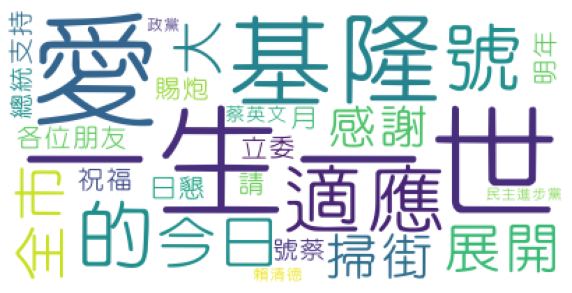

In [239]:
font='C:/Users/CHING TING/Desktop/政治與資訊/POLITICS-AND-INFORMATION-master/POLITICS-AND-INFORMATION-master/20210412_code/cwTeXYen_zhonly.ttf'

wc = WordCloud(background_color='white',font_path=font)
wc.generate(text)
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
plt.show()

In [240]:
tsai['jieba_results'] = tsai_docs
tsai_post = tsai[['new_date','message','jieba_results','like_count']]
tsai_post

,new_date,message,jieba_results,like_count
0,2019-07-14,明天是解嚴32週年，民主自由在過去，不是像呼吸、喝水般的平常，感謝過去許多民主前輩的奉獻，讓每台灣可以成為亞洲華人世界，多元文化的民主國家！\n\n#解嚴32週年 #民主自由 #得來不易\n\n歡迎跟適應加好友～\nhttp://line.me/ti/p/%40fxi6200r,明天 是 解嚴 週年 民主自由 在 過去 不是 像 呼吸 喝水 般的 平常 感謝 過去 許多 民主 前輩 的 奉獻 讓 每 台灣 可以 成為 亞洲華人 世界 多元 文化 的 民主 國家 解嚴 週年 民主自由 得來 不易 歡迎 跟 適應加 好友 / / / / /,9
1,2019-03-31,夢想盃揮灑熱情活力，鷹俠與眾位教練指導孩子們，一同享受棒球運動的樂趣！\n\n很高興可以幫助夢想盃棒球賽，引薦社會資源，讓許多喜愛棒球的孩子們，可以在大武崙棒球場競賽，也恭喜深美國小拿到冠軍，基隆的基層棒球需要各界人士一起來相挺，鷹俠和教練們週日的指導，相信孩子們都能獲益良多；另外，感謝大日開發公司捐贈15萬元給基隆家扶中心，幫助更多的孩子。\n\n基隆市大武崙棒球場和週邊的綠地，適應幫助基隆市政府向中央爭取的大武崙森林公園，目前已經在規劃中，未來將會有41公頃的森林休憩空間、結合複合多功能的運動場地，讓我們基隆的運動環境更趨完善。\n\n#兩日棒球營\n#夢想盃少年棒球比賽\n#百轟鷹俠造訪大武崙,夢想 盃 揮灑 熱情 活力 鷹俠 與 眾位 教練 指導 孩子 們 一同 享受 棒球 運動 的 樂趣 很 高興 可以 幫助 夢 想 盃 棒球 賽 引薦 社會 資源 讓 許多喜 愛 棒球 的 孩子 們 可以 在 大武 崙 棒球 場競賽 也 恭喜 深美國 小 拿到 冠 軍 基隆 的 基層 棒球 需要 各界人士 一起 來 相挺 鷹俠 和 教練們 週日 的 指導 相信 孩子 們 都 能 獲益 良多 另外 感謝 大日 開發 公司 捐贈 萬元給 基隆 家 扶 中心 幫助 更 多 的 孩子 基隆市 大武 崙 棒球 場和 週邊 的 綠地 適應 幫助 基隆市 政府 向 中央 爭取 的 大武 崙 森林 公園 目前 已經 在 規劃 中 未來 將會 有 公頃 的 森林 休憩 空間 結合 複 合 多功能 的 運動場 地 讓 我們 基隆 的 運動 環境 更 趨 完善 兩日 棒球 營 夢想 盃 少年 棒球 比賽 百轟鷹 俠 造訪 大武 崙,9
2,2019-01-04,《國際扶輪社3490地區》\n《九社聯合幫助安樂高中弱勢學子》\n\n國際扶輪3490地區基隆分區九個社團聯合服務社區，捐贈基隆市立安樂高級\n中學20萬元，與校方執行助學計畫幫助弱勢學生，今日(1/4)邀請適應、國際扶輪社3490地區基隆分區扶輪社、基隆社、基隆南區社、基隆東區社、基隆西北區社、基隆東南社、基隆中區社、新北北海岸社、基隆永昌社、新北瑞芳社，一同捐贈善款資助弱勢學生助學計畫。\n\n適應與國際扶輪社3490地區長期都關注基隆學子的就學環境，一起號招九社聯合來幫助弱勢家庭的學生，讓孩子們不會因為經濟問題，無法繼續穩定就學，我們會持續來用心關懷，所有學子的就學環境。\n\n#國際扶輪社3490地區\n#九社聯合幫助安樂高中弱勢學子\n#立法委員蔡適應,《 國際 扶輪社 地區 《 九社 聯合 幫助安樂 高中 弱勢 學子 國際 扶輪 地區 基隆 分區 九個 社團 聯合 服務 社區 捐贈 基隆市 立安樂 高級 中學 萬元 與 校方 執行助 學計畫 幫助 弱勢 學生 今日 / 邀請 適應 國際 扶輪社 地區 基隆 分區 扶輪社 基隆 社 基隆 南區社 基隆 東區社 基隆 西北 區社 基隆 東 南社 基隆 中區社 新北 北海岸 社 基隆 永昌 社 新北 瑞芳 社 一同 捐贈 善款 資助 弱勢 學生助 學計畫 適應 與 國際 扶輪社 地區長 期 都 關注 基隆 學子 的 就 學環境 一起 號招 九社 聯合來 幫助 弱勢 家庭 的 學生 讓 孩子 們 不會 因為 經濟 問題 無法 繼續 穩定 就 學 我們 會 持續 來 用心 關懷 所有 學子 的 就 學環境 國際 扶輪社 地區 九社 聯合 幫助安樂 高中 弱勢 學子 立法 委員 蔡 適應,30
3,2019-09-03,《協助信義國中棒球體育班，媒合企業捐贈天成外套、幸福點心》\n\n適應與基隆市政府不斷的努力下，促成 ＃台北陽明山國際獅子會 、 ＃台北聯合國際聯青社 與東岸商場經營業者 ＃大日開發 ，在9月2日下午聯合捐贈信義國中棒球隊30件，每件價值1500元的棒球外套，還有每天練球後的點心費用一年、共9萬6千元。\n\n讓球員們於每天練球完畢後，有點心可吃，保持充沛的體力，接續在5點開始上課業加強輔導課。\n\n在基隆市推廣棒球運動非常不容易，感謝捐贈的企業團體，可以一起來支持基層體育，讓信義國中棒球隊的孩子有信心！共同來協助基隆基層棒球的發展，希望透過這樣的努力，能讓棒球運動在基隆也能夠發展起來。\n\n＃信義國中棒球隊 ＃天成外套 ＃幸福點心,《 協助 信義國 中 棒球 體育班 媒合 企業 捐贈 天成 外套 幸福 點心 適應 與 基隆市 政府 不斷 的 努力 下 促成 台北 陽明 山國際 獅子會 台北 聯合國際 聯青社 與 東岸 商場 經營業者 大日 開發 在 月 日 下午 聯合 捐贈 信義國 中 棒球 隊 件 每件 價值 元 的 棒球 外套 還有 每天 練球 後 的 點心 費用 一年 共 萬 千元 讓 球員們 於 每天 練球 完畢 後 有點心 可 吃 保持 充沛 的 體力 接續 在 點開始 上 課業 加強 輔導課 在 基隆市 推廣 棒球 運動 非常 不 容易 感謝 捐贈 的 企業 團體 可以 一起 來 支持 基層 體育 讓 信義國 中 棒球 隊 的 孩子 有 信心 共同 來 協助 基隆 基層 棒球 的 發展 希望 透過 這樣 的 努力 能 讓 棒球 運動 在 基隆 也 能夠 發展 起來 信義國 中 棒球 隊 天成 外套 幸福 點心,39
4,2019-01-09,《青年學子展現藝文長才 教師培育功不可沒》\n\n在頒發學生的藝文競賽獎狀之前，首先要感謝老師們的細心栽培，適應很有榮幸能夠頒發獎狀，表揚我們的教師，也期許每位學子，能夠繼續精進學業與藝文能力、五育並進！\n\n＃基隆市107年度\n＃藝文競賽聯合頒獎典禮\n＃孩子們的才藝斐然\n＃立法委員蔡適應,《 青年 學子展 現藝 文長 才 教師 培育 功 不可 沒 在 頒 發學生 的 藝文 競賽 獎狀 之前 首先 要 感謝 老師們 的 細心 栽培 適應 很 有榮 幸能 夠頒發 獎狀 表揚 我們 的 教師 也 期許 每位 學子 能夠 繼續 精進 學業 與 藝文 能力 五育 並進 基隆市 年度 藝文 競賽 聯合 頒獎 典禮 孩子 們 的 才 藝 斐然 立法 委員 蔡 適應,40
...,...,...,...,...
919,2019-07-10,《接受徵召 全力以赴》\n\n民進黨中執會今宣布，將徵適應參選基隆市區域立委，我會持續全力以赴，爭取繼續為基隆市民服務的機會。\n\n過去三年的任期，適應與市長 林右昌UChange分工合作，為基隆爭取許多建設，包括軍港遷移、大基隆歷史場景計畫、基隆輕軌，都已經陸續動工興建，林右昌是最能擘畫與執行建設的市長，而蔡適應是最能幫基隆中央爭取建設預算的立委。\n\n除了地方建設外，在國家政策領域，適應深耕外交國防，專業問政也獲得民間團體肯定，公民監督國會聯盟的評鑑，更是連續六會期獲得優秀立委。\n\n爭取連任是為了繼續服務基隆市民，基隆還有許多的建設需要中央支持，包括高地社區供水補助、快捷公車核定、公路品質提升、長照2.0、河川整治，我期待繼續在這些與民息息相關的民生議題領域中，為基隆爭取更多的經費。\n\n#全力以赴 #持續為基隆打拚,《 接受 徵召 全力以赴 民進黨 中 執會 今 宣布 將徵適 應 參選 基隆市 區域 立委 我會 持續 全力以赴 爭取 繼續 為 基隆 市民 服務 的 機會 過去 三年 的 任期 適應 與 市長 林右昌 分工合作 為 基隆 爭取 許多 建設 包括 軍港 遷移 大 基隆 歷史場 景計畫 基隆 輕軌 都 已經 陸續動 工興建 林右昌 是 最能 擘畫 與 執行 建設 的 市長 而 蔡 適應 是 最能 幫 基隆 中央 爭取 建設 預算 的 立委 除了 地方 建設 外 在 國家 政策 領域 適應 深耕 外交 國防 專業 問政 也 獲得民間 團體 肯定 公民 監督國會 聯盟 的 評鑑 更是 連續 六會期 獲得 優秀 立委 爭取 連任 是 為 了 繼續 服務 基隆 市民 基隆 還有 許多 的 建設 需要 中央 支持 包括 高地 社區 供水 補助 快捷 公車 核定 公路 品質 提升 長 照 河川 整治 我 期待 繼續 在 這些 與 民息息 相關 的 民生 議題 領域 中 為 基隆 爭取 更 多 的 經費 全力以赴 持續 為 基隆 打 拚,6091
920,2019-07-21,感謝許多前來記者會相挺的朋友，適應就任3年多來每天戰戰兢兢，想著要讓基隆進步，在立法院問政，配合市長的規劃，爭取中央支持，做基隆建設的最佳後盾！\n\n競選連任，懇請您繼續相挺。\n\n#相挺適應 #基隆必勝\n#公督盟評鑑 #優秀立委\n-\n-\n-\n-\n-\n——相關新聞連結——\n立委蔡適應競選連任 卓榮泰：明星帥立委做明星級建設\nhttps://news.ltn.com.tw/news/poli

<AxesSubplot:ylabel='Frequency'>

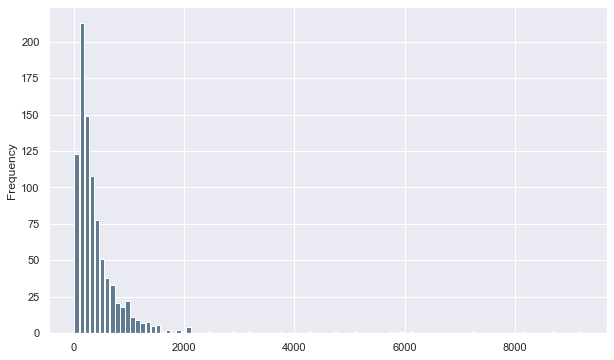

In [241]:
commutes = tsai_post['like_count']#看讚數的分布
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')

#超過2000讚的貼文並不是多數

In [242]:
temp = tsai_post[(tsai_post['like_count'] <= 3000) & (tsai_post['like_count'] > 500)]
temp#假設選取讚數在500~3000的FB貼文

,new_date,message,jieba_results,like_count
688,2019-12-12,周廚牛肉麵🍜\n料多味美的在地美食！\n地址：基隆市中正區北寧路390號\n營業時間：11:30～20:00\n\n#歡迎前往 #休週一週二,周廚 牛肉 麵 🍜 料 多味 美的 在 地 美食 地址 基隆市 中正 區北寧路 號 營業 時間 歡迎 前往 休週 一週 二,502
689,2019-11-15,《中山區快捷公車 送交公路總局審議》\n\n中午，適應約了 張秉鈞。最認真 議員、基隆市政府交通處、公路總局在國會辦公室，協調中山區的快捷公車相關事宜，並且希望公路總局考量基隆市民的需求，向公路總局提交審議，讓路線可以盡速完成。\n\n我們會持續關心進度，讓基隆市民可以享有更便捷的城際運輸！\n\n＃中山區快捷公車 ＃第四條快捷公車\n＃路線審議中 ＃協助基隆市城際運輸,《 中山 區 快捷 公車 送交 公路 總局 審議 中午 適應 約 了 張秉鈞 最認 真 議員 基隆市 政府 交通 處 公路 總局 在 國會 辦公室 協調 中山 區的 快捷 公車 相關 事宜 並且 希望 公路 總局 考量 基隆 市民 的 需求 向 公路 總局 提交 審議 讓 路線 可以 盡速 完成 我們 會 持續 關心 進度 讓 基隆 市民 可以 享有 更 便捷 的 城際 運輸 中山 區 快捷 公車 第四 條 快捷 公車 路線 審議 中 協助 基隆市 城際 運輸,505
690,2019-11-06,《二連勝確定晉級複賽》\n謝謝今天奮力拼戰的球員們\n還有昨日嗨嗨和潘忠韋的分析！\n\n11/7（四）18:30\n基隆火車站南站廣場\n我們ㄧ起幫中華隊加油！\n\n#2020台灣要贏 #東京我們來了\n#世界棒球12強賽 #前進東京奧運,《 二連勝 確定 晉級 複 賽 謝謝 今天 奮 力拼 戰 的 球員們 還有 昨日 嗨 嗨 和 潘忠韋 的 分析 / 四 基隆 火 車站 南站 廣場 我們 ㄧ 起幫 中華隊 加油 台灣 要贏 東京 我們 來 了 世界 棒球 強賽 前進 東京 奧運,506
691,2019-04-22,余大哥是我尊敬的前輩！今天晚上三重區即將進行初選民調。請您跟住三重的朋友提醒一下，接到民調電話，請堅定支持余天。,余 大哥 是 我 尊敬 的 前輩 今天 晚上 三重 區即 將進 行初 選民調 請 您 跟 住 三重 的 朋友 提醒 一下 接到 民調 電話 請 堅定 支持 余天,507
692,2019-11-13,南港展覽館公車站遮雨棚工程\n9026候車回基隆即將完工，敬請期待！\n\n造福通勤族 改善南港展覽館站前候車環境\nhttps://pse.is/L4PPR\n\n#9026候車改善 #不再淋雨,南港 展覽館 公 車站 遮雨棚 工程 候車 回 基隆 即將 完工 敬請 期待 造福 通勤 族 改善 南港 展覽館 站 前候 車環境 / / / 候車 改善 不再 淋雨,508
...,...,...,...,...
907,2019-11-30,【我主張：全面下架吳斯懷！】\n\n1996年台海飛彈危機時，適應是職業軍人，當時的我們都做好了隨時要與中共解放軍面對面的心理準備，但我們卻從沒想過，未來將會有一位台灣的退役將領到對岸唱著中共的國歌。\n\n這位退役將領吳斯懷在台灣大力的支持統一、教導中國如何對付台灣的盟友，每個軍人心中捍衛國家的志氣與驕傲，就這樣被他踩在腳底、視作無物。\n\n若是讓這樣一個親近中共政權的人進到了國會，進到了外交與國防委員會，那麼由熱愛台灣、一心想讓台灣免於中國武力危脅的前輩們所建立起來的國安系統，將會被破壞，中共將能夠輕易的取得機密資料。如同撼動現在的香港一樣，未來中共便能夠更加直接的裂解台灣的自由、民主。\n\n台灣不需要與中共解放軍走在一起的退役將領，我們需要的是愛國、具有專業的人在國會守護台灣。\n\n這幾周來，國民黨對於民眾強烈要求不要將吳斯懷列為不分區的訴求視若無睹，那麼接下來，我們就要透過選舉、透過選票，讓國民黨看到我們捍衛民主的決心。\n\n中國正步步進逼，我們必須用更積極、主動的態度面對這樣的威脅。我邀請所有關心國家安全的人、願意挺身捍衛台灣的朋友，共同加入響應全民下架吳斯懷的行列。\n\n 壯闊台灣 吳怡農 賴品妤 高嘉瑜 許淑華Hsu Shu-Hua\n＃全民下架吳斯懷 ＃是可忍孰不可忍,我主張 全面 下架 吳斯懷 年 台海飛彈危機 時 適應 是 職業 軍人 當時 的 我們 都 做好 了 隨時 要 與 中共 解放 軍面 對面 的 心理 準備 但 我們 卻 從 沒想過 未來 將會 有 一位 台灣 的 退役 將領 到 對岸 唱 著 中共 的 國歌 這位 退役 將領 吳斯懷 在 台灣 大力 的 支持 統一 教導 中國 如何 對付 台灣 的 盟友 每個 軍人 心中 捍衛國家 的 志氣 與 驕傲 就 這樣 被 他 踩 在 腳底 視作 無物 若 是 讓 這樣 一個 親近 中共 政權 的 人 進到 了 國會 進到 了 外交 與 國防委員會 那麼 由 熱愛台灣 一 心想 讓 台灣免 於 中國 武力 危脅 的 前輩們 所 建立 起來 的 國安系統 將會 被 破壞 中共 將能夠 輕易 的 取得 機密 資料 如同 撼動現 在 的 香港 一樣 未來 中共 便 能夠 更加 直接 的 裂解 台灣 的 自由 民主 台灣 不 需要 與 中共 解放 軍走 在 一起 的 退役 將領 我們 需要 的 是 愛國 具有 專業 的 人 在 國會 守護 台灣 這幾周 來 國民黨 對 於 民眾 強烈 要求 不要 將吳斯 懷列 為 不 分區 的 訴求 視若 無睹 那麼 接下 來 我們 就要 透過 選舉 透過 選票 讓 國民黨 看到 我們 捍衛 民主 的 決心 中國正 步步 進逼 我們 必須 用 更 積極 主動 的 態度面 對 這樣 的 威脅 我 邀 請 所有 關心 國家 安全 的 人 願意 挺身 捍衛 台灣 的 朋友 共同 加入 響應 全民 下架 吳斯懷 的 行列 壯闊 台灣 吳怡農 賴品 妤 高嘉瑜 許淑華 全民 下架 吳斯懷 是可忍 孰不可忍,2066
908,2019-12-18,第一名的立委、選一號！\n\n2020台灣要贏、基隆一定贏！,第一名 的 立委 選一號 台灣 要贏 基隆 一定 贏,2104
909,2019-06-23,守護台灣民主，我們風雨無阻！\n\n#太晚到只能在外圍\n#聽水牛伯演講\n\n快來跟適應加line好友～\nhttp://line.me/ti/p/%40fxi6200r,守護 台灣 民主 我們 風雨 無阻 太晚 到 只能 在外 圍 聽 水牛 伯演講 快來 跟 適應加 好友 / / / / /,2121
910,2019-06-01,暑假即將到來， 基隆市警察局少年警察隊啟動青春專案，擴大青少年的犯罪預防，適應很榮幸擔任代言人，希望接下來的暑假期間，可以保護孩子們，遠離不良場所、預防犯罪發生！\n\n📢📢全面啟動 ☢️☢️\n108年「暑期保護青少年－青春專案」\n6⃣月1⃣日0⃣時起至\n8⃣月3⃣1⃣日2⃣4⃣時止\n\nWe are ready ‼️\n#淨化妨害青少年成長環境\n#防制青少年被害\n#擴大預防犯罪宣導,暑假 即將 到 來 基隆市 警察局 少年 警察 隊 啟動 青春 專案 擴大 青少年 的 犯罪 預防 適應 很榮幸 擔任 代言人 希望 接下 來 的 暑假 期間 可以 保護 孩子 們 遠離 不良 場所 預防 犯罪 發生 全面 啟動 年 暑期 保護 青少年 青春 專案 ⃣ 月 ⃣ 日 ⃣ 時起 至 ⃣ 月 ⃣ ⃣ 日 ⃣ ⃣ 時止 ‼ 淨化 妨害 青少年 成長 環境 防制 青少年 被害 擴大 預防 犯罪 宣導,2489


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [243]:
corpus = temp['jieba_results'].values.tolist()

In [244]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [245]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一下,一世,一些,一代,一件,一份,一位,一個,一切,...,黨員,黨團,黨市,黨部,鼎泰豐,鼓勵,鼓舞,齊唱,齊聚,龐大
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.183343,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.047828,0.042647,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['要贏', '總統', '感謝', '蔡適', '立委', '蔡英文', '台灣', '適應', '支持', '基隆']
TOP 10 WORDS PER TOPIC #1
['適應', '時間', '台灣', '成立大會', '一起', '我們', '上午', '基隆市', '歡迎', '基隆']
TOP 10 WORDS PER TOPIC #2
['公司', '開基', '可以', '老大公', '排骨飯', '負擔', '高地', '社區', '適應', '基隆']
TOP 10 WORDS PER TOPIC #3
['基隆市', '適應', '國造', '產業', '爭取', '園區', '補助', '台船', '基隆', '潛艦']
TOP 10 WORDS PER TOPIC #4
['我們', '大家', '還有', '基隆市', '台灣', '問好', '暖暖', '早安', '適應', '基隆']
TOP 10 WORDS PER TOPIC #5
['適應', '小吃', '兒童', '座椅', '香港', '美食', '我們', '大家', '安全', '基隆']
TOP 10 WORDS PER TOPIC #6
['文化', '多元', '海洋', '台灣', '今天', '我們', '基隆', '適應', '朋友', '住民']
TOP 10 WORDS PER TOPIC #7
['大家', '可以', '蔡適', '台灣', '七堵', '我們', '館長', '訓練', '適應', '基隆']


In [247]:
LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['信義市場', '基隆', '老大公', '開基', '手爐', '交接', '援會', '關龕', '各位朋友', '運動']
TOP 10 WORDS PER TOPIC #1
['凍蒜', '中華隊', '合作', '前進', '選一號', '奧運', '第一名', '醫院', '東京', '基隆']
TOP 10 WORDS PER TOPIC #2
['好友', '天顯宮', '伍顯', '大帝', '靈官', '作伙來', '百家姓', '印挺', '基隆', '援會']
TOP 10 WORDS PER TOPIC #3
['唱會', '應歌', '暖暖', '美食', '雞籠', '最近', '潛艦', '適應', '歡迎', '基隆']
TOP 10 WORDS PER TOPIC #4
['高嘉瑜', '成功市場', '遊行', '早餐', '熊米屋', '老鷹', '住民', '嘉年華', '補助', '海洋']
TOP 10 WORDS PER TOPIC #5
['七賢里民', '地點', '中心', '活動', '時間', '上午', '演出', '日期', '醜小鴨', '小青蛙劇團']
TOP 10 WORDS PER TOPIC #6
['感謝', '一定', '蔡適', '早安', '適應', '要贏', '蔡英文', '台灣', '基隆', '支持']
TOP 10 WORDS PER TOPIC #7
['真的', '號外', '和平島', '運動', '留鄉', '館長', '阿館', '他們', '活動', '基隆']


In [259]:
#政見做斷詞

politics_liu = politics[politics.姓名 == "蔡適應"].政見.to_string()
politics_tsai = re.sub(re_punctuation, "", politics_tsai)
politics_tsai = re.sub(r'[0-9]','',politics_tsai)
politics_tsai = re.sub(r'[a-zA-Z]','',politics_tsai)
politics_tsai = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_tsai)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_tsai, cut_all = False)
politics_words = jieba.lcut(politics_tsai, cut_all = False)

In [260]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_tsai, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [261]:
words

['英',
 '派',
 '改革',
 '\u3000',
 '適應',
 '維新',
 '\u3000',
 '在',
 '地',
 '專業',
 '\u3000',
 '深耕',
 '基隆',
 ' ',
 '與',
 '蔡英文',
 '總統候選人',
 '，',
 '林右昌',
 '市長',
 '一同',
 '打拼',
 '，',
 '讓',
 '基隆',
 '成為',
 '驕傲',
 '的',
 ' ',
 '台灣頭',
 ' ',
 '便捷',
 '交通',
 '：',
 '持續',
 '推動',
 '基北',
 '交通',
 '路網',
 '連結',
 '，',
 '打造',
 '大台北',
 '交通',
 '生活',
 ' ',
 '圈',
 ' ',
 '\u3000',
 '\u3000',
 '\u3000',
 '\u3000',
 '\u3000',
 '\x07',
 '協助',
 '市府',
 '提升',
 '公車',
 '服務',
 '，',
 '購置',
 '新型',
 '公車',
 '與',
 '智慧',
 '候車',
 ' ',
 '亭',
 ' ',
 '活水',
 '宜居',
 '：',
 '\x07',
 '加速',
 '汰換',
 '老舊',
 '自來',
 '水管',
 '，',
 '建立',
 '中央',
 '定期',
 '檢測',
 '水質制',
 ' ',
 '度',
 ' ',
 '\u3000',
 '\u3000',
 '\u3000',
 '\u3000',
 '\u3000',
 '\x07',
 '因應',
 '基隆',
 '山坡',
 '地形',
 '，',
 '編列',
 '預算',
 '逐年',
 '解決',
 '高地',
 '供水',
 '問',
 ' ',
 '題',
 ' ',
 '智慧',
 '城市',
 '：',
 '\x07',
 '協助',
 '市府',
 '打造',
 '智慧',
 '科技',
 '城市',
 '，',
 '基隆市',
 '與',
 '港',
 '服務',
 '再升',
 ' ',
 '級',
 ' ',
 '\u3000',
 '\u3000',
 '\u3000',
 '\u3000',
 '\u3000',
 '\x07',
 '推動國',
 '中小',
 '

In [262]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['健全', '港埠', '市長', '車場', '一同', '文創', '融資', '公車', '社區', '老舊']
TOP 10 WORDS PER TOPIC #1
['學童', '政府', '蔡適', '差距', '文化', '候車', '適應', '服務', '閒置', '城市']
TOP 10 WORDS PER TOPIC #2
['議員', '期照護', '過去', '情人湖', '專區', '基北', '環境', '持續', '都市', '推動']
TOP 10 WORDS PER TOPIC #3
['保護', '就業機', '住宅', '宜居', '國際', '深耕', '預算', '市府', '打造', '協助']
TOP 10 WORDS PER TOPIC #4
['立法', '風景區', '國有', '補助款', '用戶', '生活', '廠商', '公共', '加速', '基隆']
TOP 10 WORDS PER TOPIC #5
['學習', '行銷', '總統候選人', '新型', '港灣', '進駐', '蔡英文', '觀光', '修改', '交通']
TOP 10 WORDS PER TOPIC #6
['辦公室', '空間', '新天', '地產業', '活水', '協和火力電廠', '就業', '提高', '提升', '建置']
TOP 10 WORDS PER TOPIC #7
['創造', '企業', '路網', '文藝復興', '土地', '際線', '安心', '中央', '智慧', '因應']


In [263]:
#每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

204     登記
205     金斧
206     支持
207     感謝
208     基隆
209     橋向
210     六路
211     海洋
212     館長
213    基隆人
214     一一
215    醜小鴨
216     路況
217     依歸
218     操演
219     中共
220    選一號
221    伯演講
222    青少年
223     可能
Name: term, dtype: object

In [264]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數

Counter({'健全': 1,
         '港埠': 1,
         '市長': 1,
         '車場': 1,
         '一同': 1,
         '文創': 1,
         '融資': 1,
         '公車': 1,
         '社區': 2,
         '老舊': 1,
         '學童': 1,
         '政府': 1,
         '蔡適': 3,
         '差距': 1,
         '文化': 2,
         '候車': 1,
         '適應': 9,
         '服務': 1,
         '閒置': 1,
         '城市': 1,
         '議員': 1,
         '期照護': 1,
         '過去': 1,
         '情人湖': 1,
         '專區': 1,
         '基北': 1,
         '環境': 1,
         '持續': 1,
         '都市': 1,
         '推動': 1,
         '保護': 1,
         '就業機': 1,
         '住宅': 1,
         '宜居': 1,
         '國際': 1,
         '深耕': 1,
         '預算': 1,
         '市府': 1,
         '打造': 1,
         '協助': 1,
         '立法': 1,
         '風景區': 1,
         '國有': 1,
         '補助款': 1,
         '用戶': 1,
         '生活': 1,
         '廠商': 1,
         '公共': 1,
         '加速': 1,
         '基隆': 9,
         '學習': 1,
         '行銷': 1,
         '總統候選人': 1,
         '新型': 1,
         '港灣': 1,
  

#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#\

In [265]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['信義市場', '基隆', '老大公', '開基', '手爐', '交接', '援會', '關龕', '各位朋友', '運動']
TOP 10 WORDS PER TOPIC #1
['凍蒜', '中華隊', '合作', '前進', '選一號', '奧運', '第一名', '醫院', '東京', '基隆']
TOP 10 WORDS PER TOPIC #2
['好友', '天顯宮', '伍顯', '大帝', '靈官', '作伙來', '百家姓', '印挺', '基隆', '援會']
TOP 10 WORDS PER TOPIC #3
['唱會', '應歌', '暖暖', '美食', '雞籠', '最近', '潛艦', '適應', '歡迎', '基隆']
TOP 10 WORDS PER TOPIC #4
['高嘉瑜', '成功市場', '遊行', '早餐', '熊米屋', '老鷹', '住民', '嘉年華', '補助', '海洋']
TOP 10 WORDS PER TOPIC #5
['七賢里民', '地點', '中心', '活動', '時間', '上午', '演出', '日期', '醜小鴨', '小青蛙劇團']
TOP 10 WORDS PER TOPIC #6
['感謝', '一定', '蔡適', '早安', '適應', '要贏', '蔡英文', '台灣', '基隆', '支持']
TOP 10 WORDS PER TOPIC #7
['真的', '號外', '和平島', '運動', '留鄉', '館長', '阿館', '他們', '活動', '基隆']


In [266]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
688,2019-12-12,周廚 牛肉 麵 🍜 料 多味 美的 在 地 美食 地址 基隆市 中正 區北寧路 號 營業 時間 歡迎 前往 休週 一週 二
689,2019-11-15,《 中山 區 快捷 公車 送交 公路 總局 審議 中午 適應 約 了 張秉鈞 最認 真 議員 基隆市 政府 交通 處 公路 總局 在 國會 辦公室 協調 中山 區的 快捷 公車 相關 事宜 並且 希望 公路 總局 考量 基隆 市民 的 需求 向 公路 總局 提交 審議 讓 路線 可以 盡速 完成 我們 會 持續 關心 進度 讓 基隆 市民 可以 享有 更 便捷 的 城際 運輸 中山 區 快捷 公車 第四 條 快捷 公車 路線 審議 中 協助 基隆市 城際 運輸
690,2019-11-06,《 二連勝 確定 晉級 複 賽 謝謝 今天 奮 力拼 戰 的 球員們 還有 昨日 嗨 嗨 和 潘忠韋 的 分析 / 四 基隆 火 車站 南站 廣場 我們 ㄧ 起幫 中華隊 加油 台灣 要贏 東京 我們 來 了 世界 棒球 強賽 前進 東京 奧運
691,2019-04-22,余 大哥 是 我 尊敬 的 前輩 今天 晚上 三重 區即 將進 行初 選民調 請 您 跟 住 三重 的 朋友 提醒 一下 接到 民調 電話 請 堅定 支持 余天
692,2019-11-13,南港 展覽館 公 車站 遮雨棚 工程 候車 回 基隆 即將 完工 敬請 期待 造福 通勤 族 改善 南港 展覽館 站 前候 車環境 / / / 候車 改善 不再 淋雨
...,...,...
907,2019-11-30,我主張 全面 下架 吳斯懷 年 台海飛彈危機 時 適應 是 職業 軍人 當時 的 我們 都 做好 了 隨時 要 與 中共 解放 軍面 對面 的 心理 準備 但 我們 卻 從 沒想過 未來 將會 有 一位 台灣 的 退役 將領 到 對岸 唱 著 中共 的 國歌 這位 退役 將領 吳斯懷 在 台灣 大力 的 支持 統一 教導 中國 如何 對付 台灣 的 盟友 每個 軍人 心中 捍衛國家 的 志氣 與 驕傲 就 這樣 被 他 踩 在 腳底 視作 無物 若 是 讓 這樣 一個 親近 中共 政權 的 人 進到 了 國會 進到 了 外交 與 國防委員會 那麼 由 熱愛台灣 一 心想 讓 台灣免 於 中國 武力 危脅 的 前輩們 所 建立 起來 的 國安系統 將會 被 破壞 中共 將能夠 輕易 的 取得 機密 資料 如同 撼動現 在 的 香港 一樣 未來 中共 便 能夠 更加 直接 的 裂解 台灣 的 自由 民主 台灣 不 需要 與 中共 解放 軍走 在 一起 的 退役 將領 我們 需要 的 是 愛國 具有 專業 的 人 在 國會 守護 台灣 這幾周 來 國民黨 對 於 民眾 強烈 要求 不要 將吳斯 懷列 為 不 分區 的 訴求 視若 無睹 那麼 接下 來 我們 就要 透過 選舉 透過 選票 讓 國民黨 看到 我們 捍衛 民主 的 決心 中國正 步步 進逼 我們 必須 用 更 積極 主動 的 態度面 對 這樣 的 威脅 我 邀 請 所有 關心 國家 安全 的 人 願意 挺身 捍衛 台灣 的 朋友 共同 加入 響應 全民 下架 吳斯懷 的 行列 壯闊 台灣 吳怡農 賴品 妤 高嘉瑜 許淑華 全民 下架 吳斯懷 是可忍 孰不可忍
908,2019-12-18,第一名 的 立委 選一號 台灣 要贏 基隆 一定 贏
909,2019-06-23,守護 台灣 民主 我們 風雨 無阻 太晚 到 只能 在外 圍 聽 水牛 伯演講 快來 跟 適應加 好友 / / / / /
910,2019-06-01,暑假 即將 到 來 基隆市 警察局 少年 警察 隊 啟動 青春 專案 擴大 青少年 的 犯罪 預防 適應 很榮幸 擔任 代言人 希望 接下 來 的 暑假 期間 可以 保護 孩子 們 遠離 不良 場所 預防 犯罪 發生 全面 啟動 年 暑期 保護 青少年 青春 專案 ⃣ 月 ⃣ 日 ⃣ 時起 至 ⃣ 月 ⃣ ⃣ 日 ⃣ ⃣ 時止 ‼ 淨化 妨害 青少年 成長 環境 防制 青少年 被害 擴大 預防 犯罪 宣導


In [267]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-267-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\CHING TING\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
688,2019-12-12,周廚牛肉麵🍜\n料多味美的在地美食！\n地址：基隆市中正區北寧路390號\n營業時間：11:30～20:00\n\n#歡迎前往 #休週一週二,周廚 牛肉 麵 🍜 料 多味 美的 在 地 美食 地址 基隆市 中正 區北寧路 號 營業 時間 歡迎 前往 休週 一週 二,502,3
689,2019-11-15,《中山區快捷公車 送交公路總局審議》\n\n中午，適應約了 張秉鈞。最認真 議員、基隆市政府交通處、公路總局在國會辦公室，協調中山區的快捷公車相關事宜，並且希望公路總局考量基隆市民的需求，向公路總局提交審議，讓路線可以盡速完成。\n\n我們會持續關心進度，讓基隆市民可以享有更便捷的城際運輸！\n\n＃中山區快捷公車 ＃第四條快捷公車\n＃路線審議中 ＃協助基隆市城際運輸,《 中山 區 快捷 公車 送交 公路 總局 審議 中午 適應 約 了 張秉鈞 最認 真 議員 基隆市 政府 交通 處 公路 總局 在 國會 辦公室 協調 中山 區的 快捷 公車 相關 事宜 並且 希望 公路 總局 考量 基隆 市民 的 需求 向 公路 總局 提交 審議 讓 路線 可以 盡速 完成 我們 會 持續 關心 進度 讓 基隆 市民 可以 享有 更 便捷 的 城際 運輸 中山 區 快捷 公車 第四 條 快捷 公車 路線 審議 中 協助 基隆市 城際 運輸,505,3
690,2019-11-06,《二連勝確定晉級複賽》\n謝謝今天奮力拼戰的球員們\n還有昨日嗨嗨和潘忠韋的分析！\n\n11/7（四）18:30\n基隆火車站南站廣場\n我們ㄧ起幫中華隊加油！\n\n#2020台灣要贏 #東京我們來了\n#世界棒球12強賽 #前進東京奧運,《 二連勝 確定 晉級 複 賽 謝謝 今天 奮 力拼 戰 的 球員們 還有 昨日 嗨 嗨 和 潘忠韋 的 分析 / 四 基隆 火 車站 南站 廣場 我們 ㄧ 起幫 中華隊 加油 台灣 要贏 東京 我們 來 了 世界 棒球 強賽 前進 東京 奧運,506,1
691,2019-04-22,余大哥是我尊敬的前輩！今天晚上三重區即將進行初選民調。請您跟住三重的朋友提醒一下，接到民調電話，請堅定支持余天。,余 大哥 是 我 尊敬 的 前輩 今天 晚上 三重 區即 將進 行初 選民調 請 您 跟 住 三重 的 朋友 提醒 一下 接到 民調 電話 請 堅定 支持 余天,507,6
692,2019-11-13,南港展覽館公車站遮雨棚工程\n9026候車回基隆即將完工，敬請期待！\n\n造福通勤族 改善南港展覽館站前候車環境\nhttps://pse.is/L4PPR\n\n#9026候車改善 #不再淋雨,南港 展覽館 公 車站 遮雨棚 工程 候車 回 基隆 即將 完工 敬請 期待 造福 通勤 族 改善 南港 展覽館 站 前候 車環境 / / / 候車 改善 不再 淋雨,508,1
...,...,...,...,...,...
907,2019-11-30,【我主張：全面下架吳斯懷！】\n\n1996年台海飛彈危機時，適應是職業軍人，當時的我們都做好了隨時要與中共解放軍面對面的心理準備，但我們卻從沒想過，未來將會有一位台灣的退役將領到對岸唱著中共的國歌。\n\n這位退役將領吳斯懷在台灣大力的支持統一、教導中國如何對付台灣的盟友，每個軍人心中捍衛國家的志氣與驕傲，就這樣被他踩在腳底、視作無物。\n\n若是讓這樣一個親近中共政權的人進到了國會，進到了外交與國防委員會，那麼由熱愛台灣、一心想讓台灣免於中國武力危脅的前輩們所建立起來的國安系統，將會被破壞，中共將能夠輕易的取得機密資料。如同撼動現在的香港一樣，未來中共便能夠更加直接的裂解台灣的自由、民主。\n\n台灣不需要與中共解放軍走在一起的退役將領，我們需要的是愛國、具有專業的人在國會守護台灣。\n\n這幾周來，國民黨對於民眾強烈要求不要將吳斯懷列為不分區的訴求視若無睹，那麼接下來，我們就要透過選舉、透過選票，讓國民黨看到我們捍衛民主的決心。\n\n中國正步步進逼，我們必須用更積極、主動的態度面對這樣的威脅。我邀請所有關心國家安全的人、願意挺身捍衛台灣的朋友，共同加入響應全民下架吳斯懷的行列。\n\n 壯闊台灣 吳怡農 賴品妤 高嘉瑜 許淑華Hsu Shu-Hua\n＃全民下架吳斯懷 ＃是可忍孰不可忍,我主張 全面 下架 吳斯懷 年 台海飛彈危機 時 適應 是 職業 軍人 當時 的 我們 都 做好 了 隨時 要 與 中共 解放 軍面 對面 的 心理 準備 但 我們 卻 從 沒想過 未來 將會 有 一位 台灣 的 退役 將領 到 對岸 唱 著 中共 的 國歌 這位 退役 將領 吳斯懷 在 台灣 大力 的 支持 統一 教導 中國 如何 對付 台灣 的 盟友 每個 軍人 心中 捍衛國家 的 志氣 與 驕傲 就 這樣 被 他 踩 在 腳底 視作 無物 若 是 讓 這樣 一個 親近 中共 政權 的 人 進到 了 國會 進到 了 外交 與 國防委員會 那麼 由 熱愛台灣 一 心想 讓 台灣免 於 中國 武力 危脅 的 前輩們 所 建立 起來 的 國安系統 將會 被 破壞 中共 將能夠 輕易 的 取得 機密 資料 如同 撼動現 在 的 香港 一樣 未來 中共 便 能夠 更加 直接 的 裂解 台灣 的 自由 民主 台灣 不 需要 與 中共 解放 軍走 在 一起 的 退役 將領 我們 需要 的 是 愛國 具有 專業 的 人 在 國會 守護 台灣 這幾周 來 國民黨 對 於 民眾 強烈 要求 不要 將吳斯 懷列 為 不 分區 的 訴求 視若 無睹 那麼 接下 來 我們 就要 透過 選舉 透過 選票 讓 國民黨 看到 我們 捍衛 民主 的 決心 中國正 步步 進逼 我們 必須 用 更 積極 主動 的 態度面 對 這樣 的 威脅 我 邀 請 所有 關心 國家 安全 的 人 願意 挺身 捍衛 台灣 的 朋友 共同 加入 響應 全民 下架 吳斯懷 的 行列 壯闊 台灣 吳怡農 賴品 妤 高嘉瑜 許淑華 全民 下架 吳斯懷 是可忍 孰不可忍,2066,5
908,2019-12-18,第一名的立委、選一號！\n\n2020台灣要贏、基隆一定贏！,第一名 的 立委 選一號 台灣 要贏 基隆 一定 贏,2104,1
909,2019-06-23,守護台灣民主，我們風雨無阻！\n\n#太晚到只能在外圍\n#聽水牛伯演講\n\n快來跟適應加line好友～\nhttp://line.me/ti/p/%40fxi6200r,守護 台灣 民主 我們 風雨 無阻 太晚 到 只能 在外 圍 聽 水牛 伯演講 快來 跟 適應加 好友 / / / / /,2121,2
910,2019-06-01,暑假即將到來， 基隆市警察局少年警察隊啟動青春專案，擴大青少年的犯罪預防，適應很榮幸擔任代言人，希望接下來的暑假期間，可以保護孩子們，遠離不良場所、預防犯罪發生！\n\n📢📢全面啟動 ☢️☢️\n108年「暑期保護青少年－青春專案」\n6⃣月1⃣日0⃣時起至\n8⃣月3⃣1⃣日2⃣4⃣時止\n\nWe are ready ‼️\n#淨化妨害青少年成長環境\n#防制青少年被害\n#擴大預防犯罪宣導,暑假 即將 到 來 基隆市 警察局 少年 警察 隊 啟動 青春 專案 擴大 青少年 的 犯罪 預防 適應 很榮幸 擔任 代言人 希望 接下 來 的 暑假 期間 可以 保護 孩子 們 遠離 不良 場所 預防 犯罪 發生 全面 啟動 年 暑期 保護 青少年 青春 專案 ⃣ 月 ⃣ 日 ⃣ 時起 至 ⃣ 月 ⃣ ⃣ 日 ⃣ ⃣ 時止 ‼ 淨化 妨害 青少年 成長 環境 防制 青少年 被害 擴大 預防 犯罪 宣導,2489,5


In [268]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 2,5,6 這些主題相關比較熱門

Counter({6: 6, 5: 5, 4: 2, 3: 2, 0: 2, 1: 2, 2: 1})

In [269]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['教育',
 '便捷',
 '林右昌',
 '解套',
 '蔡英文',
 '總統候選人',
 '汰換',
 '協調',
 '聯合',
 '政府',
 '中小',
 '保護',
 '和平島',
 '中央',
 '公共',
 '打造',
 '基隆',
 '國會',
 '加速',
 '基隆市',
 '服務',
 '改善',
 '議員',
 '推動',
 '關心',
 '吸引',
 '交通',
 '資源',
 '候車',
 '友善',
 '碼頭',
 '就業',
 '推動國',
 '解決',
 '直轄市',
 '過去',
 '進入',
 '進駐',
 '購置',
 '第一名',
 '住宅',
 '河川',
 '預算',
 '高地',
 '空間',
 '更新',
 '中心',
 '自來',
 '市府',
 '建置',
 '文化',
 '城市',
 '法案',
 '競爭',
 '外木山',
 '適應',
 '立法',
 '觀光',
 '發展',
 '生活',
 '社區',
 '專業',
 '智慧',
 '專頁',
 '財政',
 '市長',
 '編列',
 '驕傲',
 '成立',
 '企業',
 '專區',
 '老舊',
 '軍方',
 '都市',
 '改造',
 '環境',
 '意象',
 '健康',
 '進行',
 '打拼',
 '郵輪',
 '行銷',
 '協助',
 '科技',
 '供水',
 '可以',
 '願景',
 '一同',
 '淨化',
 '土地',
 '育兒津貼',
 '基隆港',
 '連結',
 '公車',
 '努力',
 '鼓勵',
 '成為',
 '國家',
 '市民',
 '資訊',
 '地形',
 '提升',
 '微笑',
 '配合',
 '建立',
 '下水道',
 '國際',
 '情人湖',
 '台灣頭',
 '蔡適',
 '辦公室',
 '廠商',
 '修改',
 '持續',
 '改革']

In [270]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一下,一世,一些,一代,一件,一份,一位,一個,一切,...,黨員,黨團,黨市,黨部,鼎泰豐,鼓勵,鼓舞,齊唱,齊聚,龐大
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,教育,便捷,林右昌,解套,蔡英文,總統候選人,汰換,協調,聯合,政府,...,下水道,國際,情人湖,台灣頭,蔡適,辦公室,廠商,修改,持續,改革
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-272-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [273]:
match_document_politics

,教育,便捷,林右昌,解套,蔡英文,總統候選人,汰換,協調,聯合,政府,...,國際,情人湖,台灣頭,蔡適,辦公室,廠商,修改,持續,改革,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,23
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [274]:
sum(match_document_politics['sum'].tolist()) / len(match_column) 

16.42608695652174

In [275]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度

0.0733307453416149